# Student Details

***

**Name:** Hoai Nhan Nguyen <br>
**Student Number:** sba24098 <br>
**Course:** Higher Diploma in Science in Artificial Intelligence Applications 

***

# Background

***

Assume you are given the opportunity to work as a Machine Learning expert for a global bike rental firm that has operations in New York, London, Berlin, Chicago, San Francisco, Dublin, and other locations. The company offers three different bike kinds for rent: Standard, Mountain, and Electric. With 900 rows and a variety of features/ attributes/ columns, including City, Weather, Rider Age, Bike Model, Ride Length, Distance Covered, Rider Satisfaction, and Bike Rental Cost, the dataset is available on Moodle. <br>

The company is interested to leverage the provided dataset to improve operational efficiency, customer satisfaction, and pricing strategies. Your task is to understand and analyze the patterns in the customer behavior and bike rental usage across different cities, weather conditions, bike models, and age groups. Your analysis will guide the company to plan for the future and make ML based data-driven decisions on bike fleet management, pricing adjustments, and customer satisfaction improvements.

***

# Assessment Details:

***
Your responsibility as an AI expert is to explore the provided dataset to address key business based objectives. The analysis will be based on the tasks provided for machine learning.


1. Provide a conceptual understanding and logical justification based on the reasoning for the specific choice of machine learning approach (supervised/ Unsupervised) for the provided data set. You can discuss the pros and cons of both approaches based on your understanding. Make a set of independent and dependent variables based on your objectives for ML tasks. (0-20 marks) <br><br>
2. Machine Learning models can be used for Prediction, Classification, and Clustering. You can choose suitable features for the machine learning models based on feature selection methods, such as random forest or any other method. The selection of hyperparameters for the ML models should be performed by using hyperparameter tuning, such as GridSearchCV. Obtain the best accuracy using optimal values of the hyperparameters. (0-30 marks) <br><br>
3. You should train and test the Machine learning models in the case of supervised learning for different splits (at least 2 splits) and use appropriate metrics for unsupervised learning. Use k-fold (10 or 20 or 30) cross-validation to provide authenticity of the modelling outcomes. (0-30 marks)<br><br>
4. Exhibit a comparison of ML modelling outcomes using a Table or graphical visualisation. Identify the possible similarities and contrasts in the Machine Learning modelling outcomes based on chosen performance metric and discuss their statistical implications. (0-20 marks)

***

**1. Data Understanding -  Exploratory Data Analysis**

**Importing libraries**

In [1]:
# Importing the libraries for the implementation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random


**Loading Dataset**

In [2]:
# Loading the dataset
df = pd.read_excel('data/biking_dataset.xlsx')

**Inpecting Dataframe Structure**

In [3]:
# Inpecting the shape of the dataframe.
df.shape

(900, 8)

In [4]:
# Inpecting the head of the dataframe
df.head(10)

,City,Weather Condition,Rider Age,Bike Model,Ride Duration (min),Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($)
0,Berlin,Rainy,53.0,Standard,62.0,2.25,High,22.63
1,San Francisco,Cloudy,39.0,Standard,5.0,21.67,Medium,7.87
2,Berlin,Sunny,43.0,Electric,106.0,28.40,High,39.40
3,San Francisco,Cloudy,24.0,Standard,119.0,5.66,Low,37.63
4,New York,Sunny,24.0,Mountain,11.0,25.74,Low,13.12
5,Berlin,Rainy,25.0,Mountain,92.0,19.34,High,30.61
6,San Francisco,Cloudy,43.0,Mountain,73.0,39.50,Low,31.23
7,London,Snowy,41.0,Standard,89.0,28.84,High,29.84
8,Chicago,Rainy,41.0,Mountain,96.0,26.47,Medium,36.27
9,San Francisco,Cloudy,57.0,Electric,22.0,23.03,High,25.04


In [5]:
# Summary info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   890 non-null    object 
 1   Weather Condition      889 non-null    object 
 2   Rider Age              885 non-null    float64
 3   Bike Model             890 non-null    object 
 4   Ride Duration (min)    887 non-null    float64
 5   Distance Covered (km)  887 non-null    float64
 6   Rider Satisfaction     889 non-null    object 
 7   Bike Rental Cost ($)   891 non-null    float64
dtypes: float64(4), object(4)
memory usage: 56.4+ KB


In [6]:
# Inpecting columns in the dataframe
df.columns

Index(['City', 'Weather Condition', 'Rider Age', 'Bike Model',
       'Ride Duration (min)', 'Distance Covered (km)', 'Rider Satisfaction',
       'Bike Rental Cost ($)'],
      dtype='object')

In [7]:
# Inpecting missing values in the dataframe
df.isna().sum()

City                     10
Weather Condition        11
Rider Age                15
Bike Model               10
Ride Duration (min)      13
Distance Covered (km)    13
Rider Satisfaction       11
Bike Rental Cost ($)      9
dtype: int64

In [8]:
# Removing rows with missing values
df = df.dropna()

In [9]:
# Inspecting if there is any duplicate row.
df.duplicated().sum()

0

In [10]:
# Describing a statistical summary of the dataframe 
df.describe()

,Rider Age,Ride Duration (min),Distance Covered (km),Bike Rental Cost ($)
count,853.000000,853.00000,853.000000,853.000000
mean,39.262603,61.76905,20.152016,26.564033
std,12.332311,34.18023,11.226650,9.501788
min,18.000000,5.00000,0.510000,7.330000
25%,29.000000,32.00000,10.750000,19.110000
50%,39.000000,62.00000,19.990000,27.080000
75%,50.000000,92.00000,29.200000,34.010000
max,60.000000,120.00000,39.870000,48.380000


In [12]:
# Inpecting the shape of the dataframe again.
df.shape

(853, 8)

**Dataframe Visualization**

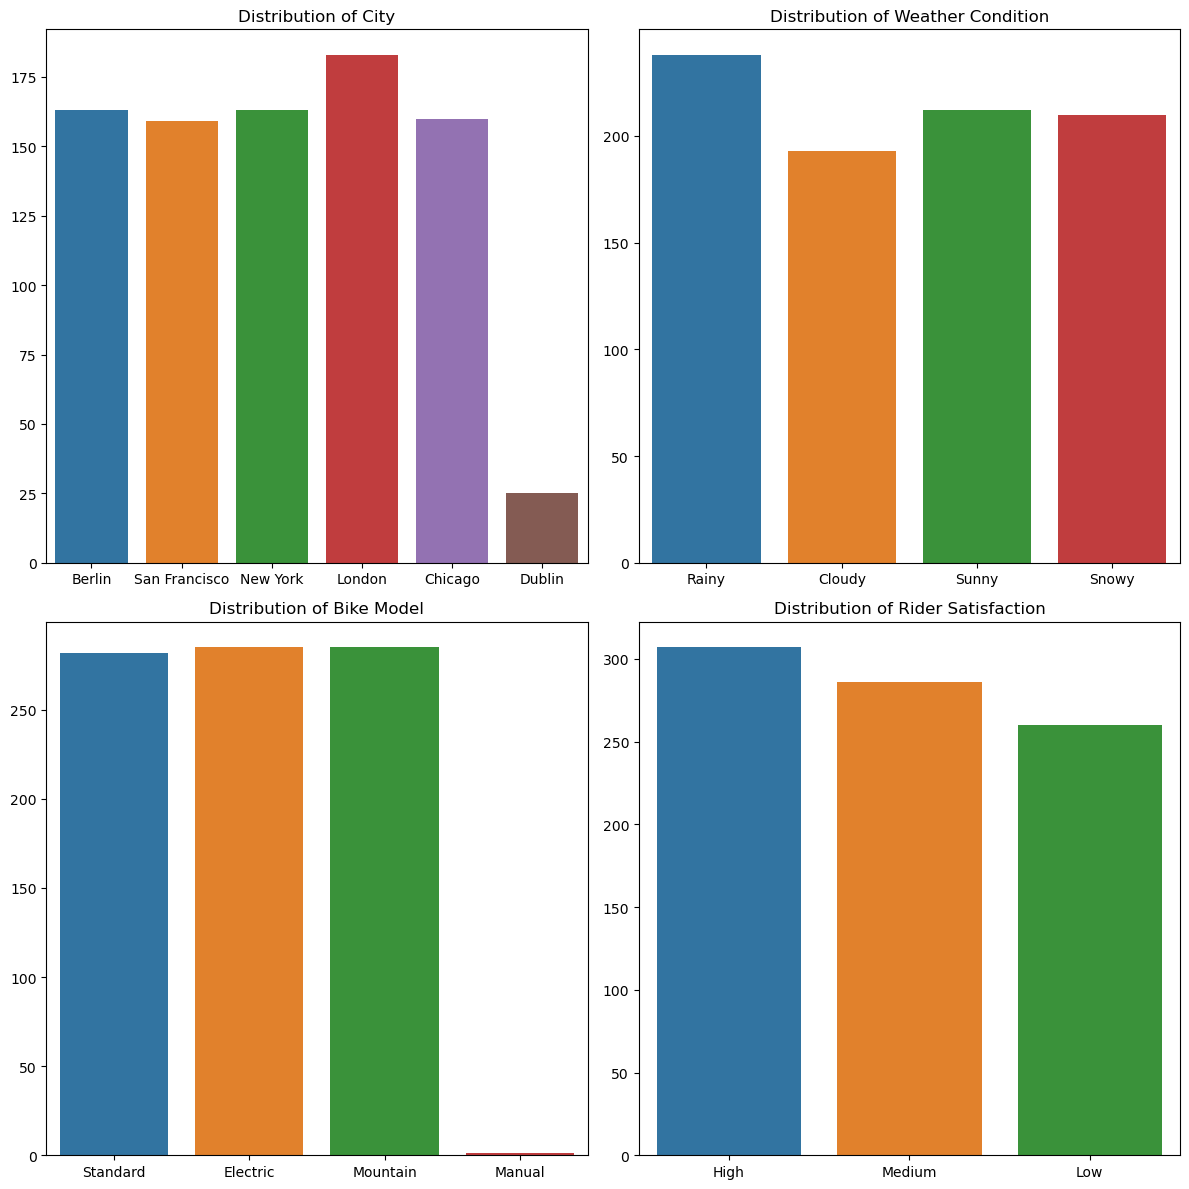

In [13]:
# Selecting only categorical features
categorical_features = df.select_dtypes(include=['object']).columns

# Length of categorical features
categorical_length = len(categorical_features)

# Calculate the number of rows and columns dynamically based on the number of features
fig, ax = plt.subplots(nrows=(categorical_length // 2) + (categorical_length % 2), ncols=2, figsize=(12, categorical_length * 3))
ax = ax.flatten()

# Loop through each categorical feature and create a countplot
for i, column in enumerate(categorical_features):
    
    # Plot a countplot based on feature count
    sns.countplot(data=df, x=column, ax=ax[i], hue=column, legend=False)

    # Adding title to the countplot
    ax[i].set_title(f'Distribution of {column}')
    
    # Removing the xlabels
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()


In [15]:
# Selecting only numerical features 
numerical_features = df.select_dtypes(include=['float64'])

# Detect outliers using IQR for each numerical feature
Q1 = df[numerical_features.columns].quantile(0.25)
Q3 = df[numerical_features.columns].quantile(0.75)
IQR = Q3 - Q1

# Define outliers (values outside 1.5 * IQR from Q1 and Q3)
outliers = ((df[numerical_features.columns] < (Q1 - 1.5 * IQR)) |
            (df[numerical_features.columns] > (Q3 + 1.5 * IQR)))

outlier_count = outliers.sum()
print(outlier_count)

Rider Age                0
Ride Duration (min)      0
Distance Covered (km)    0
Bike Rental Cost ($)     0
dtype: int64


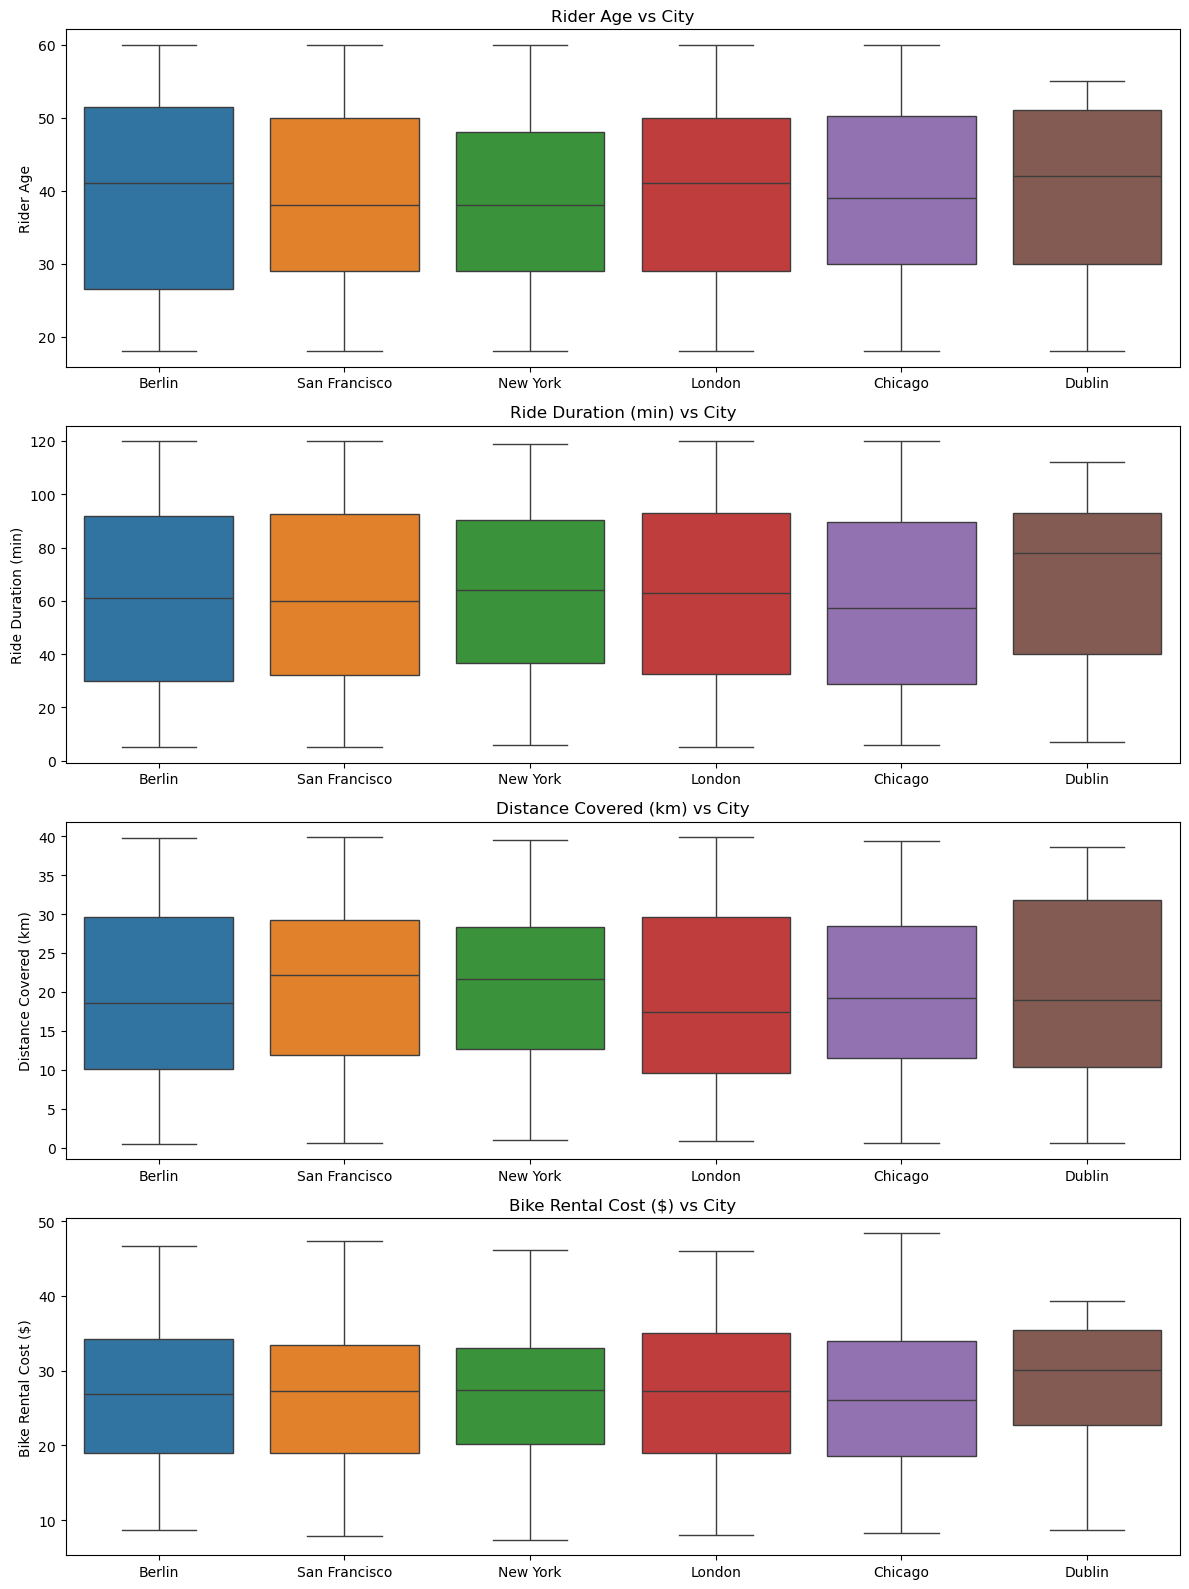

In [35]:
# Calculate the number of rows and columns dynamically based on the number of features
number_of_features = len(numerical_features.columns)
number_of_cols = 1
number_of_rows = (number_of_features // number_of_cols) + (number_of_features % number_of_cols > 0)

# Defining the plot figure size
plt.figure(figsize=(12, number_of_rows * 4))

# For loop to create boxplots visualization for each numerical feature
for i, feature in enumerate(numerical_features.columns, 1):
    # Creating the subplots dynamically
    plt.subplot(number_of_rows, number_of_cols, i)
    # Boxplot based on each City and numerical features (Rider Age, Ride Duration (min), Distance Covered (km) or Bike Rental Cost ($))
    sns.boxplot(x='City', y=feature, data=df, hue='City', legend=False)
    # Adding title to the boxplot
    plt.title(f'{feature} vs City')
    # Removing the xlabels
    plt.xlabel('')
    
plt.tight_layout()
plt.show()

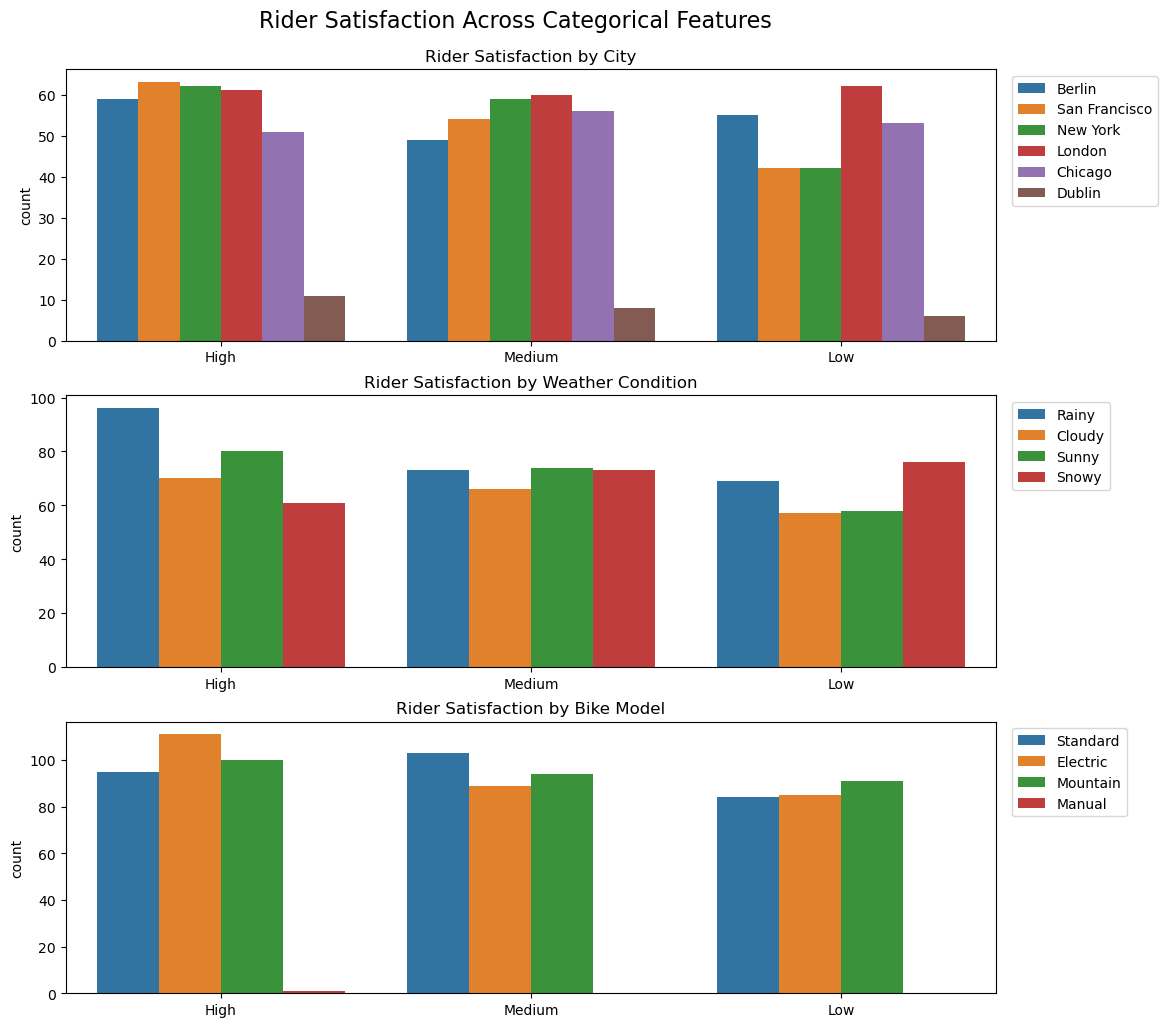

<Figure size 1200x1200 with 0 Axes>

In [31]:
# Selecting only categorical features except for the Rider Satisfaction feature
categorical_features_no_rider_satisfaction = df.select_dtypes(include=['object']).drop('Rider Satisfaction', axis=1)

# Calculate the number of rows and columns dynamically based on the number of features
number_of_features = len(categorical_features_no_rider_satisfaction.columns)
number_of_cols = 1
number_of_rows = (number_of_features // number_of_cols) + (number_of_features % number_of_cols > 0)

# Creating the subplots dynamically
fig, ax = plt.subplots(nrows=number_of_rows, ncols=number_of_cols, figsize=(12, number_of_rows * 4))

# Defining the plot figure size
plt.figure(figsize=(12, number_of_rows * 4))

# Adding title to overall subplots
fig.suptitle("Rider Satisfaction Across Categorical Features", fontsize=16, y=0.93)

# Loop through each categorical_features_no_rider_satisfaction column and create a countplot
for i, column in enumerate(categorical_features_no_rider_satisfaction):
    
    # Countplot based on Rider Satisfaction and categorical features (cities, weather conditions, or bike models)
    sns.countplot(data=df, x='Rider Satisfaction', hue=column, ax=ax[i])
  
    # Placing Legend outside the countplot chart
    ax[i].legend(loc='upper left', bbox_to_anchor=(1.01, 1))

    # Adding title to the countplot
    ax[i].set_title(f'Rider Satisfaction by {column}')
    # Removing the xlabels
    ax[i].set_xlabel('')

# Adjusting layout and showing plot
plt.tight_layout()
plt.show()



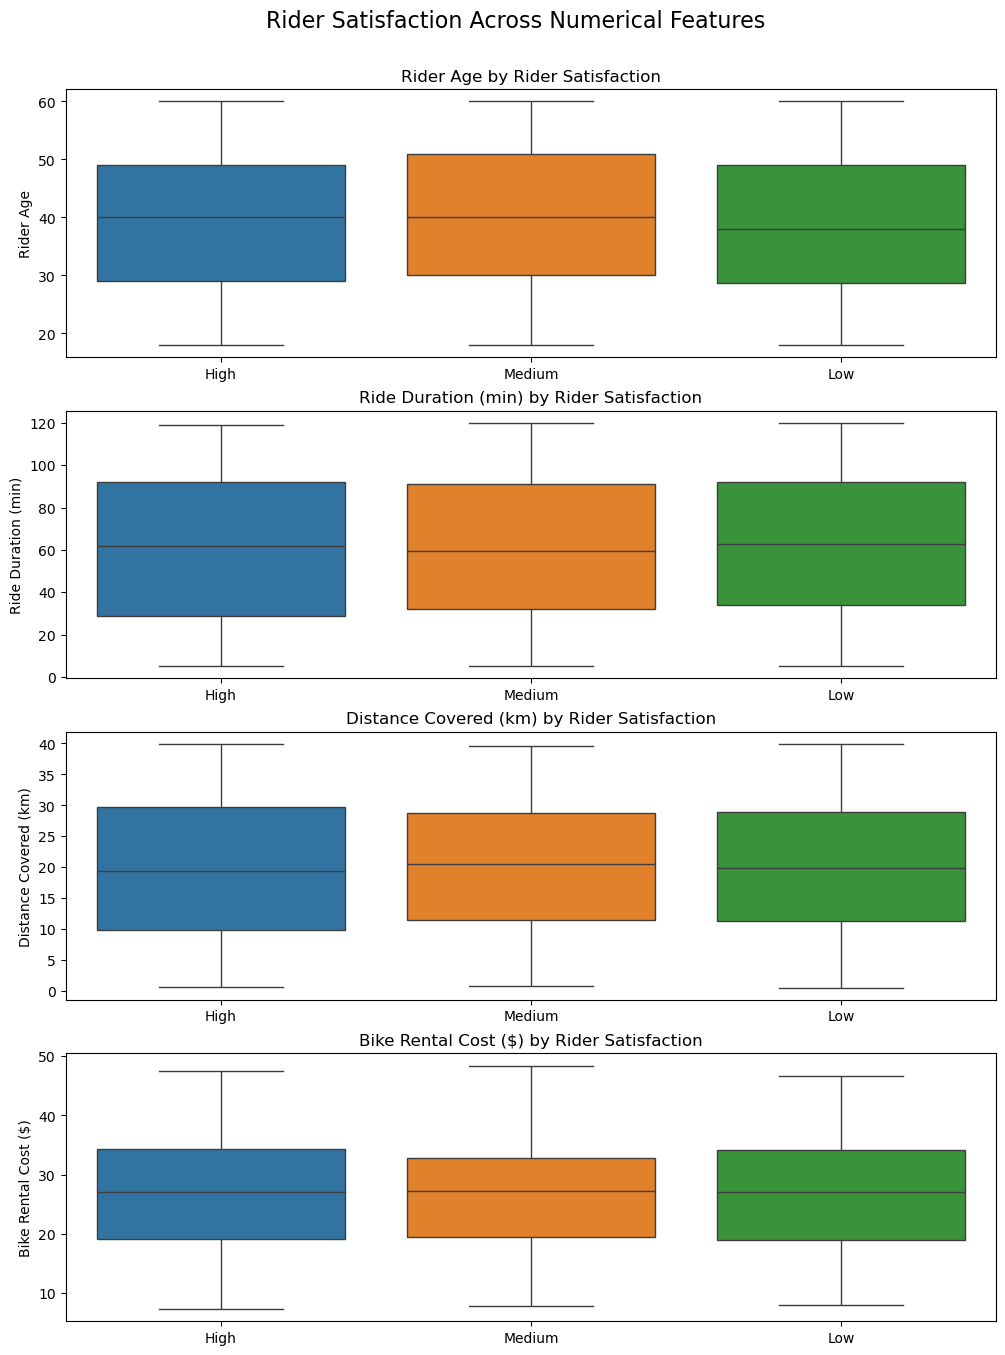

<Figure size 1200x1600 with 0 Axes>

In [37]:
# Selecting only numerical features 
numerical_features = df.select_dtypes(include=['float64'])

# Calculate the number of rows and columns dynamically based on the number of features
number_of_features = len(numerical_features.columns)
number_of_cols = 1
number_of_rows = (number_of_features // number_of_cols) + (number_of_features % number_of_cols > 0)

# Create the subplots dynamically
fig, ax = plt.subplots(nrows=number_of_rows, ncols=number_of_cols, figsize=(12, number_of_rows * 4))

# Adding title to overall subplots
fig.suptitle("Rider Satisfaction Across Numerical Features", fontsize=16, y=0.93)

# Defining the plot figure size
plt.figure(figsize=(12, number_of_rows * 4))

# Loop through each numerical feature and create a boxplot
for i, column in enumerate(numerical_features):
    
    # Boxplot based on Rider Satisfaction and numerical features (Rider Age, Ride Duration (min), Distance Covered (km) or Bike Rental Cost ($))
    sns.boxplot(data=df, x='Rider Satisfaction', y=column, hue = 'Rider Satisfaction', ax=ax[i])
    
    # Adding title to the boxplot
    ax[i].set_title(f'{column} by Rider Satisfaction')
    # Removing the xlabels
    ax[i].set_xlabel('')
    
# Adjusting layout and showing plot
plt.tight_layout()
plt.show()


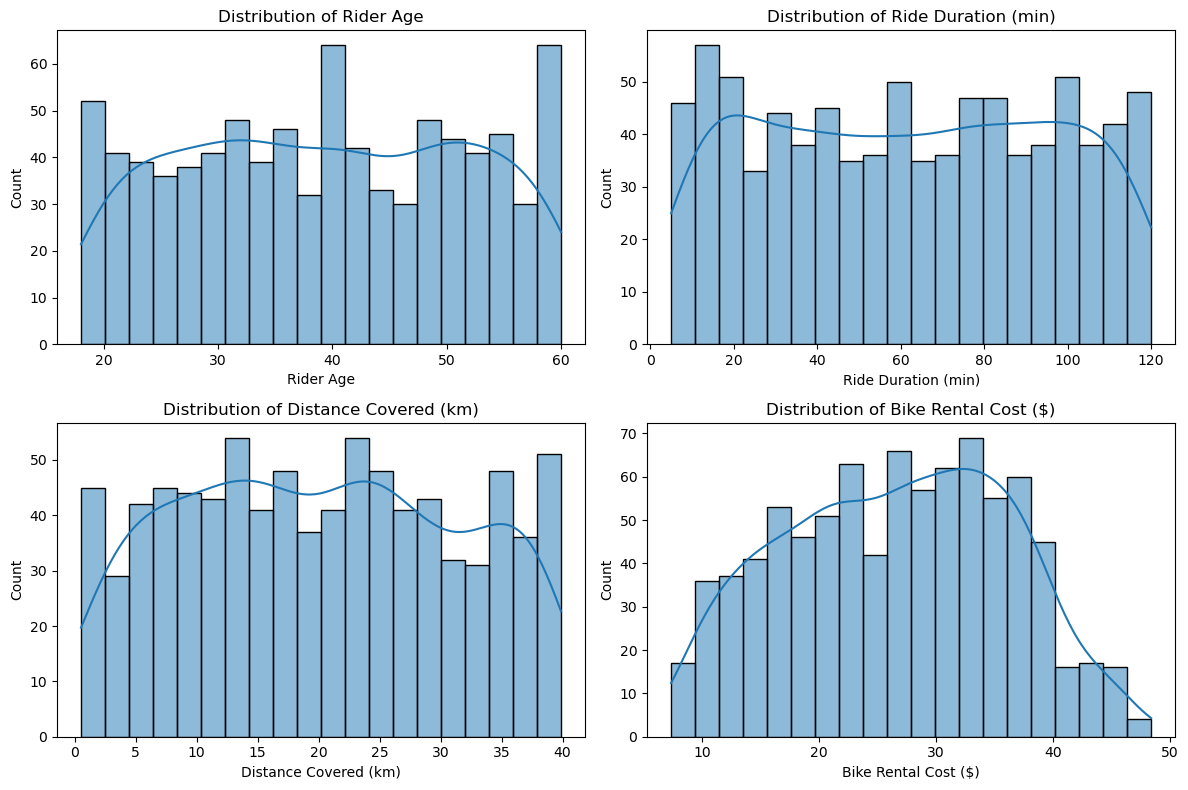

In [38]:
# Selecting only numerical features
numerical_features = df.select_dtypes(include=['float64'])

# Calculate the number of rows and columns dynamically based on the number of features
number_of_features = len(numerical_features.columns)
number_of_cols = 2
number_of_rows = (number_of_features // number_of_cols) + (number_of_features % number_of_cols > 0)

# Defining the plot figure size
plt.figure(figsize=(12, number_of_rows * 4))

# For loop to create visualization of the distribution of each numerical feature
for i, feature in enumerate(numerical_features.columns, 1):
    # Creating the subplots dynamically
    plt.subplot(number_of_rows, number_of_cols, i)
    # Histplot to get the distribution of numerical feature
    sns.histplot(numerical_features[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}')

# Adjusting layout and showing plot
plt.tight_layout()
plt.show()

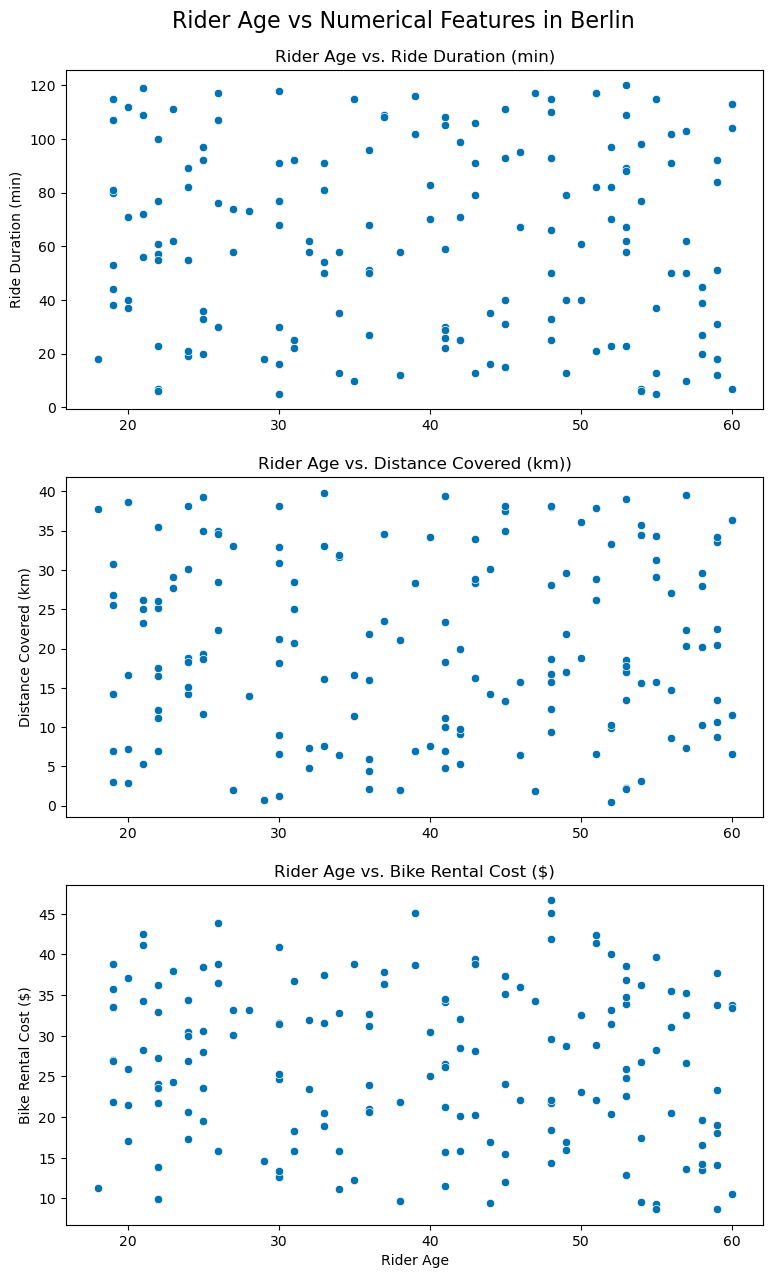

In [40]:
# Creating subplots for the charts
fig,((ax1,ax2,ax3)) = plt.subplots(nrows=3, figsize=(9,15))

# Filter the dataframe for a specificed city 
df_new_york = df[df['City'] == "Berlin"]

# Adding title to overall subplots
fig.suptitle("Rider Age vs Numerical Features in Berlin", fontsize=16, y=0.92)

# Scatterplot for Rider age vs Ride Duration (min)
sns.scatterplot(data=df_new_york,  x='Rider Age',  y='Ride Duration (min)',ax=ax1, color='#0173B2')
ax1.set_title('Rider Age vs. Ride Duration (min)')
ax1.set_xlabel('')

# Scatterplot for Rider age vs Distance Covered (km)
sns.scatterplot(data=df_new_york,  x='Rider Age',  y='Distance Covered (km)',ax=ax2, color='#0173B2')
ax2.set_title('Rider Age vs. Distance Covered (km))')
ax2.set_xlabel('')

# Scatterplot for Rider age vs Bike Rental Cost ($)
sns.scatterplot(data=df_new_york,  x='Rider Age',  y='Bike Rental Cost ($)',ax=ax3, color='#0173B2')
ax3.set_title('Rider Age vs. Bike Rental Cost ($)')

# Showing plot
plt.show()

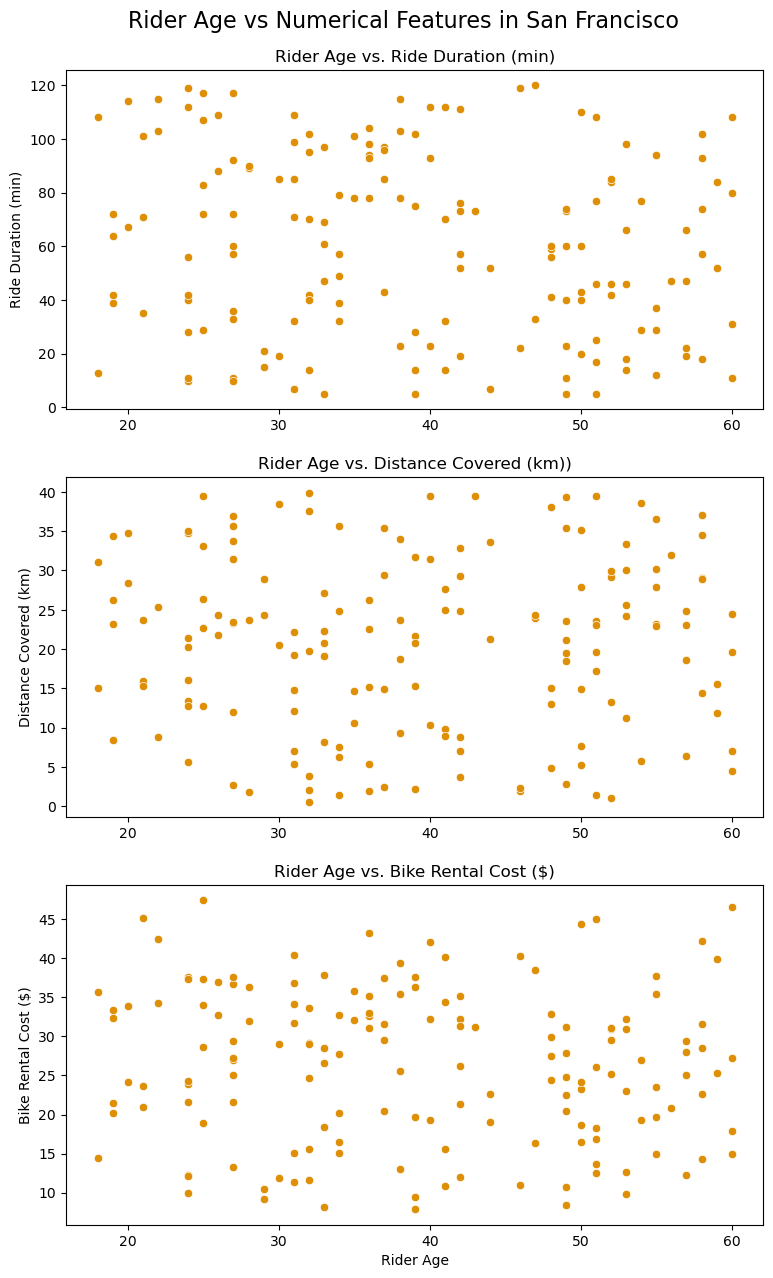

In [41]:
# Creating subplots for the charts
fig,((ax1,ax2,ax3)) = plt.subplots(nrows=3, figsize=(9,15))

# Filter the dataframe for a specificed city 
df_new_york = df[df['City'] == "San Francisco"]

# Adding title to overall subplots
fig.suptitle("Rider Age vs Numerical Features in San Francisco", fontsize=16, y=0.92)

# Scatterplot for Rider age vs Ride Duration (min)
sns.scatterplot(data=df_new_york,  x='Rider Age',  y='Ride Duration (min)',ax=ax1, color='#DE8F05')
ax1.set_title('Rider Age vs. Ride Duration (min)')
ax1.set_xlabel('')

# Scatterplot for Rider age vs Distance Covered (km)
sns.scatterplot(data=df_new_york,  x='Rider Age',  y='Distance Covered (km)',ax=ax2, color='#DE8F05')
ax2.set_title('Rider Age vs. Distance Covered (km))')
ax2.set_xlabel('')

# Scatterplot for Rider age vs Bike Rental Cost ($)
sns.scatterplot(data=df_new_york,  x='Rider Age',  y='Bike Rental Cost ($)',ax=ax3, color='#DE8F05')
ax3.set_title('Rider Age vs. Bike Rental Cost ($)')

# Showing plot
plt.show()

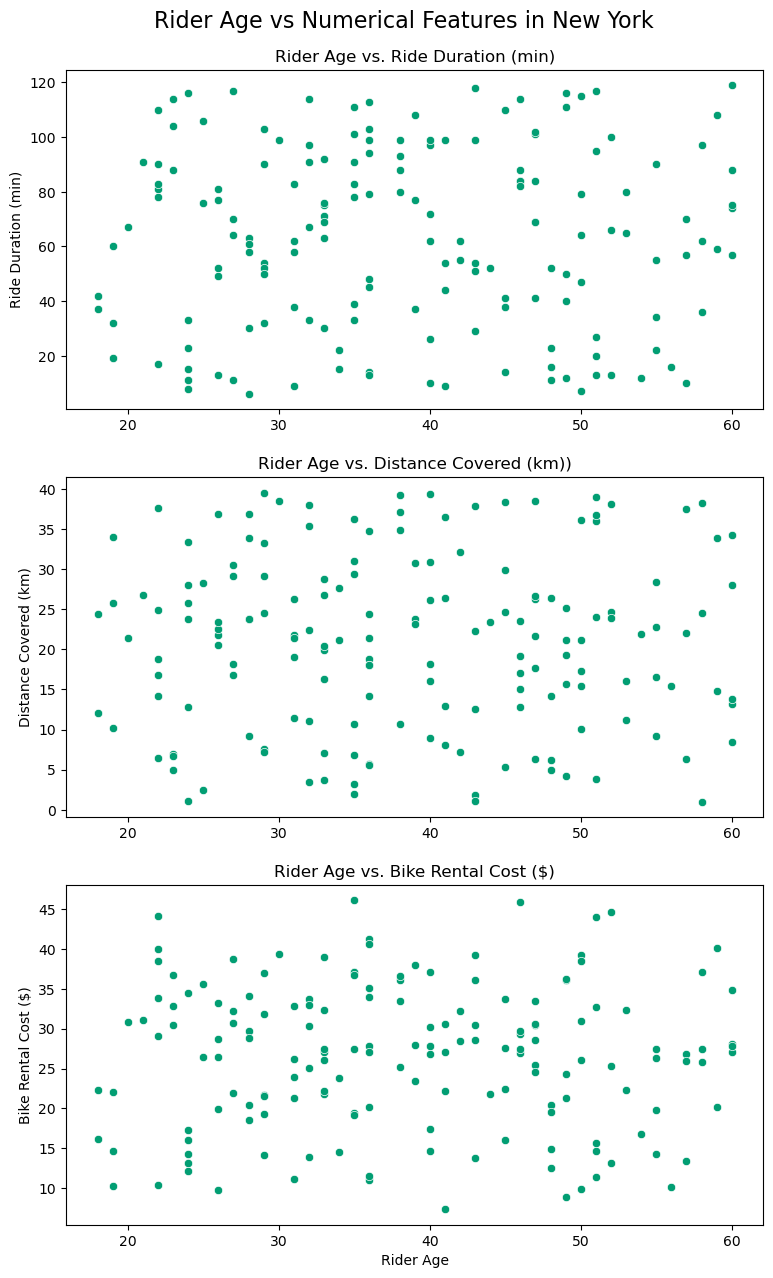

In [42]:
# Creating subplots for the charts
fig,((ax1,ax2,ax3)) = plt.subplots(nrows=3, figsize=(9,15))

# Filter the dataframe for a specificed city 
df_new_york = df[df['City'] == "New York"]

# Adding title to overall subplots
fig.suptitle("Rider Age vs Numerical Features in New York", fontsize=16, y=0.92)

# Scatterplot for Rider age vs Ride Duration (min)
sns.scatterplot(data=df_new_york,  x='Rider Age',  y='Ride Duration (min)',ax=ax1, color='#029E73')
ax1.set_title('Rider Age vs. Ride Duration (min)')
ax1.set_xlabel('')

# Scatterplot for Rider age vs Distance Covered (km)
sns.scatterplot(data=df_new_york,  x='Rider Age',  y='Distance Covered (km)',ax=ax2, color='#029E73')
ax2.set_title('Rider Age vs. Distance Covered (km))')
ax2.set_xlabel('')

# Scatterplot for Rider age vs Bike Rental Cost ($)
sns.scatterplot(data=df_new_york,  x='Rider Age',  y='Bike Rental Cost ($)',ax=ax3, color='#029E73')
ax3.set_title('Rider Age vs. Bike Rental Cost ($)')

# Showing plot
plt.show()

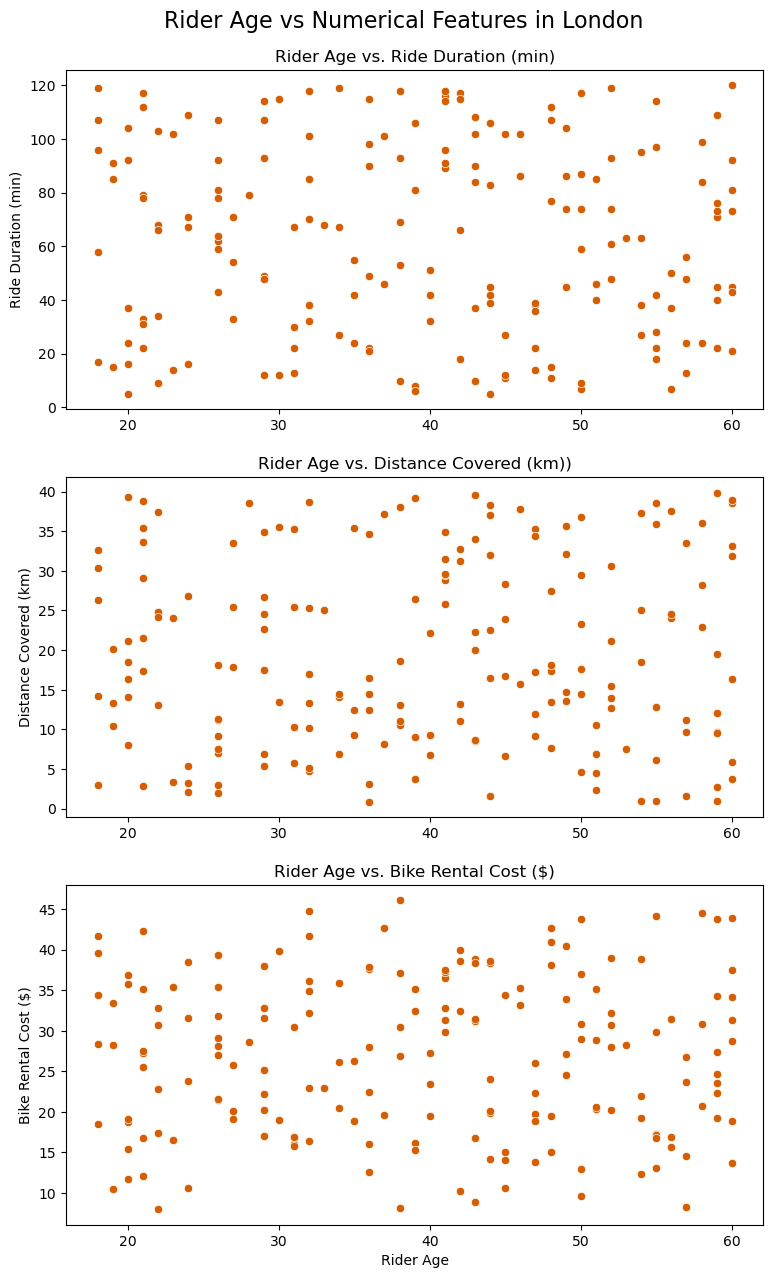

In [43]:
# Creating subplots for the charts
fig,((ax1,ax2,ax3)) = plt.subplots(nrows=3, figsize=(9,15))

# Filter the dataframe for a specificed city 
df_new_york = df[df['City'] == "London"]

# Adding title to overall subplots
fig.suptitle("Rider Age vs Numerical Features in London", fontsize=16, y=0.92)

# Scatterplot for Rider age vs Ride Duration (min)
sns.scatterplot(data=df_new_york,  x='Rider Age',  y='Ride Duration (min)',ax=ax1, color='#D55E00')
ax1.set_title('Rider Age vs. Ride Duration (min)')
ax1.set_xlabel('')

# Scatterplot for Rider age vs Distance Covered (km)
sns.scatterplot(data=df_new_york,  x='Rider Age',  y='Distance Covered (km)',ax=ax2, color='#D55E00')
ax2.set_title('Rider Age vs. Distance Covered (km))')
ax2.set_xlabel('')

# Scatterplot for Rider age vs Bike Rental Cost ($)
sns.scatterplot(data=df_new_york,  x='Rider Age',  y='Bike Rental Cost ($)',ax=ax3, color='#D55E00')
ax3.set_title('Rider Age vs. Bike Rental Cost ($)')

# Showing plot
plt.show()

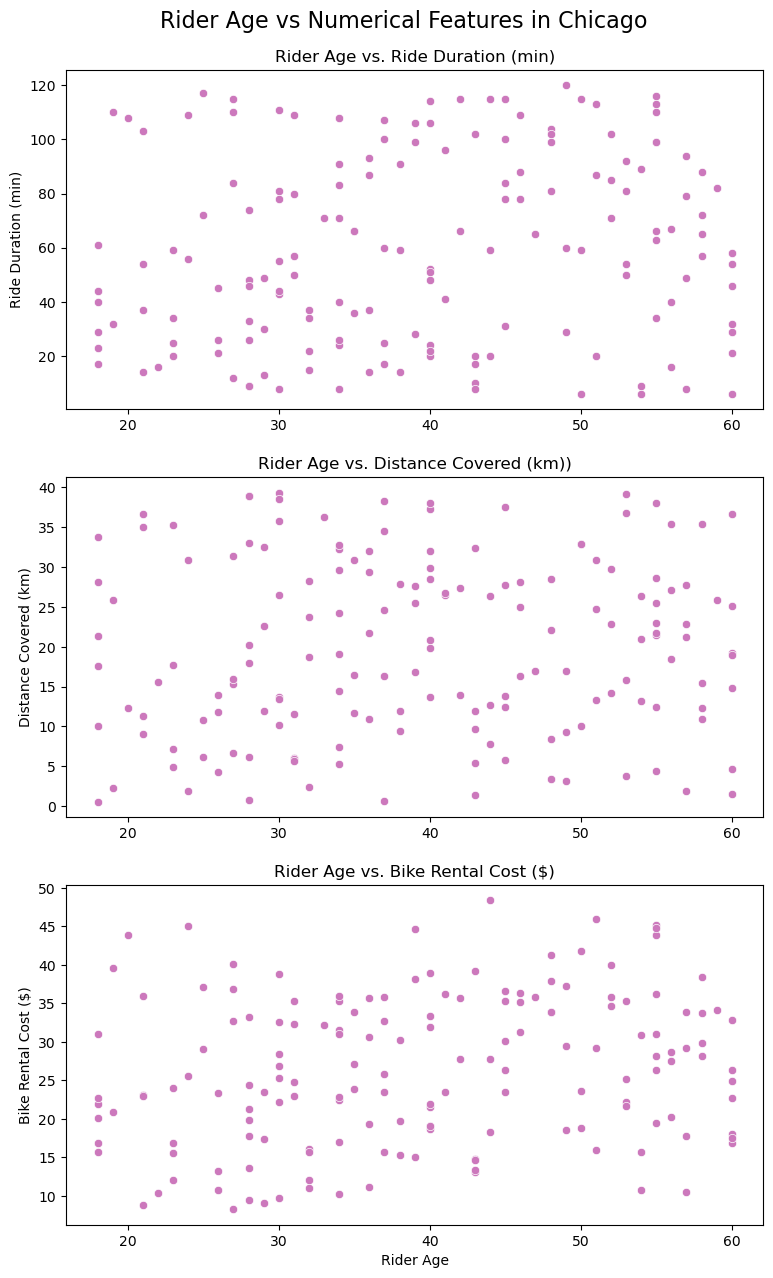

In [44]:
# Creating subplots for the charts
fig,((ax1,ax2,ax3)) = plt.subplots(nrows=3, figsize=(9,15))

# Filter the dataframe for a specificed city 
df_new_york = df[df['City'] == "Chicago"]

# Adding title to overall subplots
fig.suptitle("Rider Age vs Numerical Features in Chicago", fontsize=16, y=0.92)

# Scatterplot for Rider age vs Ride Duration (min)
sns.scatterplot(data=df_new_york,  x='Rider Age',  y='Ride Duration (min)',ax=ax1, color='#CC78BC')
ax1.set_title('Rider Age vs. Ride Duration (min)')
ax1.set_xlabel('')

# Scatterplot for Rider age vs Distance Covered (km)
sns.scatterplot(data=df_new_york,  x='Rider Age',  y='Distance Covered (km)',ax=ax2, color='#CC78BC')
ax2.set_title('Rider Age vs. Distance Covered (km))')
ax2.set_xlabel('')

# Scatterplot for Rider age vs Bike Rental Cost ($)
sns.scatterplot(data=df_new_york,  x='Rider Age',  y='Bike Rental Cost ($)',ax=ax3, color='#CC78BC')
ax3.set_title('Rider Age vs. Bike Rental Cost ($)')

# Showing plot
plt.show()

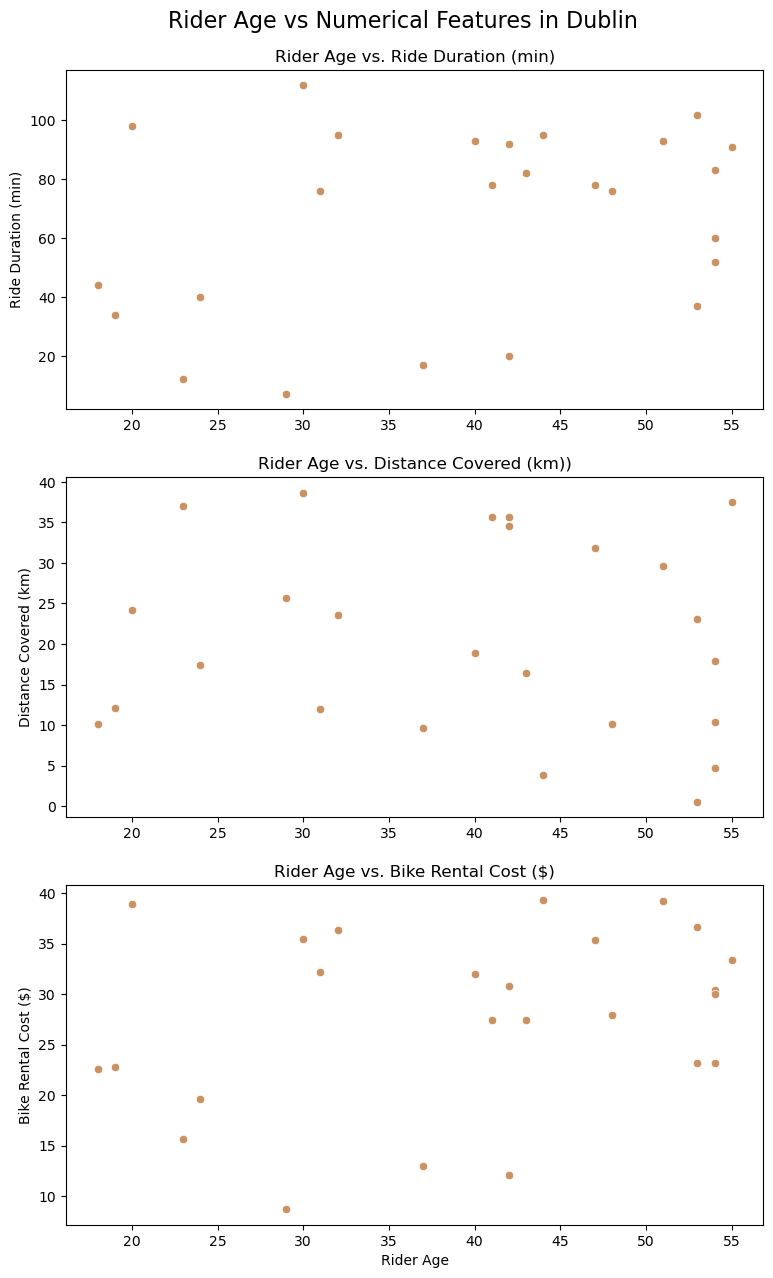

In [45]:
# Creating subplots for the charts
fig,((ax1,ax2,ax3)) = plt.subplots(nrows=3, figsize=(9,15))

# Filter the dataframe for a specificed city 
df_new_york = df[df['City'] == "Dublin"]

# Adding title to overall subplots
fig.suptitle("Rider Age vs Numerical Features in Dublin", fontsize=16, y=0.92)

# Scatterplot for Rider age vs Ride Duration (min)
sns.scatterplot(data=df_new_york,  x='Rider Age',  y='Ride Duration (min)',ax=ax1, color='#CA9161')
ax1.set_title('Rider Age vs. Ride Duration (min)')
ax1.set_xlabel('')

# Scatterplot for Rider age vs Distance Covered (km)
sns.scatterplot(data=df_new_york,  x='Rider Age',  y='Distance Covered (km)',ax=ax2, color='#CA9161')
ax2.set_title('Rider Age vs. Distance Covered (km))')
ax2.set_xlabel('')

# Scatterplot for Rider age vs Bike Rental Cost ($)
sns.scatterplot(data=df_new_york,  x='Rider Age',  y='Bike Rental Cost ($)',ax=ax3, color='#CA9161')
ax3.set_title('Rider Age vs. Bike Rental Cost ($)')

# Showing plot
plt.show()

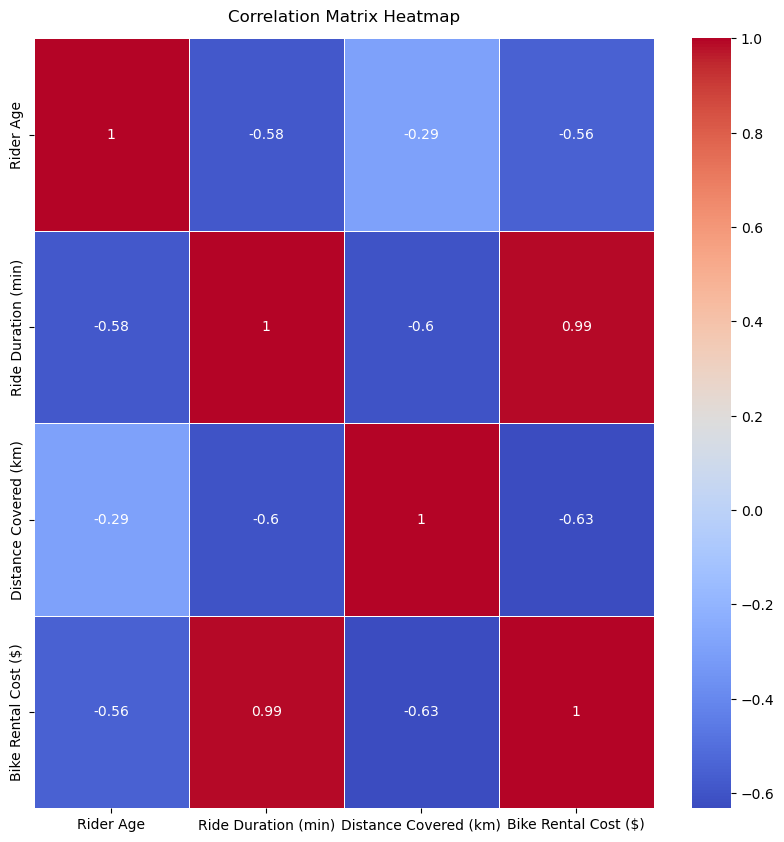

In [47]:
# Defining only the numeric columns of the dataframe
df_numeric_features = df[['Rider Age', 'Ride Duration (min)', 'Distance Covered (km)', 'Bike Rental Cost ($)']].corr()

# Defining the size of the figure of the chart
plt.figure(figsize = (10, 10))

# Calculate the correlation matrix for dataframe features.
correlation_matrix = df_numeric_features.corr()

# Creating heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Defining title of the figure
plt.title("Correlation Matrix Heatmap", pad=12)

# Show the plot
plt.show()